In [3]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#module_path = os.path.abspath(os.path.join('CATENets/'))

#if module_path not in sys.path:
#    sys.path.append(module_path)
#from catenets.models.jax import TNet, SNet,SNet1, SNet2, SNet3, DRNet, RANet, PWNet, RNet, XNet

In [8]:
pd.read_csv("trauma_top_10_fatures_responder_drlearner.csv",index_col=0)

,feature,count (%),sign
1,scenefirstpulse,100.0,-1.0
4,edfirstbp,100.0,1.0
6,edgcs,100.0,-1.0
7,causecode_MV,100.0,1.0
8,scenegcs,100.0,-1.0
9,causecode_FALL,100.0,1.0
0,causecode_PEDESTRIAN,92.0,1.0
5,sex_M,83.0,-1.0
11,causecode_GUN,83.0,1.0
12,causecode_CUT,75.0,-1.0


In [10]:
pd.read_csv("trauma_top_10_fatures_responder_mask.csv",index_col=0)

,feature,count (%),sign
9,edgcs,100.0,-1.0
8,scenegcs,92.0,-1.0
12,ethnicity_N,83.0,-1.0
7,causecode_STRUCK,83.0,-1.0
1,edfirstbp,83.0,1.0
0,sex_F,67.0,1.0
2,causecode_FALL,67.0,1.0
14,sex_M,58.0,-1.0
6,causecode_MV,58.0,1.0
16,traumatype_P,50.0,-1.0


In [28]:
path = "results_d=20_n=3000_r=0/"
correlation = np.load(path+ "correlations.npy")
KL = np.load(path+ "kls.npy")
pehes = np.load(path+ "pehes.npy")

models = [TNet(nonlin="relu"),  DRNet(nonlin="relu"), RANet(nonlin="relu"),
          PWNet(nonlin="relu"), XNet(nonlin="relu"),
          SNet(nonlin="relu") , SNet1(nonlin="relu"), SNet2(nonlin="relu"), 
          SNet3(nonlin="relu")]

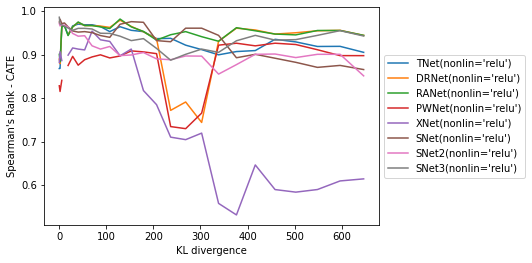

In [25]:
for i in range(len(models)):
    if i != 6:
        plt.plot(KL, correlation[i,:, 1], label=str(models[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Spearman's Rank - CATE")
plt.xlabel("KL divergence")
plt.show()

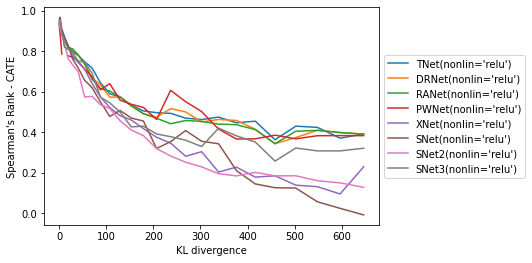

In [26]:
for i in range(len(models)):
    if i != 6:
        plt.plot(KL, correlation[i,:, 0], label=str(models[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Spearman's Rank - CATE")
plt.xlabel("KL divergence")
plt.show()

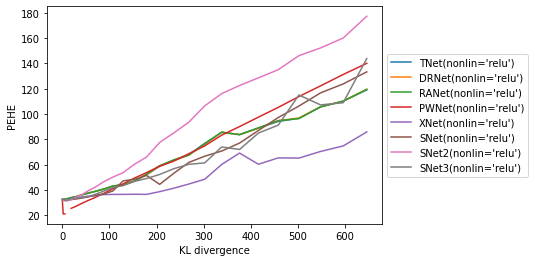

In [29]:
for i in range(len(models)):
    if i != 6: 
        plt.plot(KL, pehes[i,:], label=str(models[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("KL divergence")
plt.ylabel("PEHE")
plt.savefig(path+"KL_pehe.png")

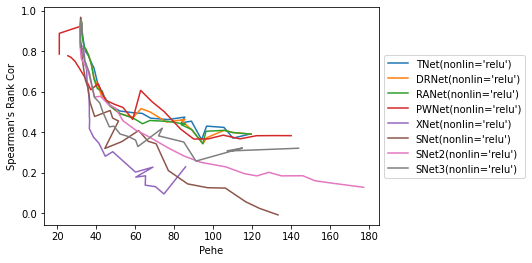

In [33]:
for i in range(len(models)):
    if i != 6:
        plt.plot(pehes[i,:], correlation[i,:, 0],label=str(models[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Pehe")
plt.ylabel("Spearman's Rank Cor")
plt.savefig(path+"spearman_pehe.png")

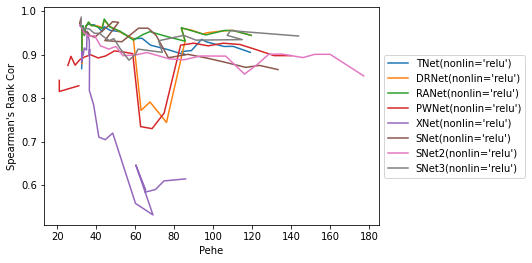

In [34]:
for i in range(len(models)):
    if i != 6:
        plt.plot(pehes[i,:], correlation[i,:, 1],label=str(models[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Pehe")
plt.ylabel("Spearman's Rank Cor")
plt.savefig(path+"spearman_pehe_abs.png")